In [1]:
#@title Imports { vertical-output: true, form-width: "15%" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os.path
from google.colab import drive
drive.mount('/content/drive')
sns.set(style="darkgrid")
#setting correct dir
os.chdir('/content/drive/MyDrive/KAUST!!/researchProj/transportationModel/outputAnalysis')

#setting plot style
plt.rcParams["font.family"] = "serif"

Mounted at /content/drive


In [2]:
#@title Graphic 1: Read in ammonia data {form-width: "15%" }

#we want dataset where you index by year,demand scenario then get a list for the final cost of the three sites

siteLocs = ["northWest","centralWest","northEast"]
years = ["2017","2018","2019"]
fuelType = "ammonia"
monthStartPairs = [["1","6"]]
demandScenarios = ["Europe","Asia"]

masterPlotDataset = {}

for year in years:
  for demandScenario in demandScenarios:
    siteCosts = []
    for siteLoc in siteLocs:
      finalCostSum = 0
      dataPoints = 0
      for monthStartPair in monthStartPairs:
        fileName = f"{fuelType}_{siteLoc}_{demandScenario}_{year}_{monthStartPair[0]}_{monthStartPair[1]}"
        try:
          data = pd.read_pickle(f'../modelOutputs/{fileName}.pkl')
          finalCostSum += data["Final Cost"]
          dataPoints += 1
        except:
          print(f"No file: {fileName}")
      
      #adding average to year cost
      siteCosts.append(finalCostSum/dataPoints)

    #adding to master dataset
    masterPlotDataset[year,demandScenario] = 1000*np.array(siteCosts)


#then going through and reading unique even split data
demandScenario = "EvenSplit"
monthStart = 1
monthEnd = 6
for year in years:
  siteCosts = []
  for siteLoc in siteLocs:
    #read in data
    fileName = f"{fuelType}_{siteLoc}_{demandScenario}_{year}_{monthStart}_{monthEnd}"
    data = pd.read_pickle(f'../modelOutputs/{fileName}.pkl')

    #year data
    siteCosts.append(data["Final Cost"])

    #adding to master dataset
    masterPlotDataset[year,demandScenario] = 1000*np.array(siteCosts)


#now getting out PLCOA-NEED to change for HYDROGEN
plcoaDataset = {}
for year in years:
  siteLocCosts = []
  for siteLoc in siteLocs:

    #used for averaging two year runs
    totalPLCOA = 0

    for yearPart in [0,1]:
      #reading in output from optimization model and setting up structure for data viz
      #excelName = f"northWestSite_{timePeriod[0]}_{timePeriod[1]}"
      excelName = f"{siteLoc}_part{yearPart}_{year}"

      #getting out year results for site
      singleValueData = pd.read_excel(f"../../ammoniaProduction/modelOutputs/baseResults/{siteLoc}/{excelName}.xlsx",sheet_name="singleValueDvs",usecols=["LCOA"]).abs()

      #adding total LCOA
      totalPLCOA += singleValueData["LCOA"][0]

    #appending to cost list the average over the two runs for that year
    siteLocCosts.append(totalPLCOA/2)
  
  #changing to $ per ton
  plcoaDataset[year] = 1000*np.array(siteLocCosts)



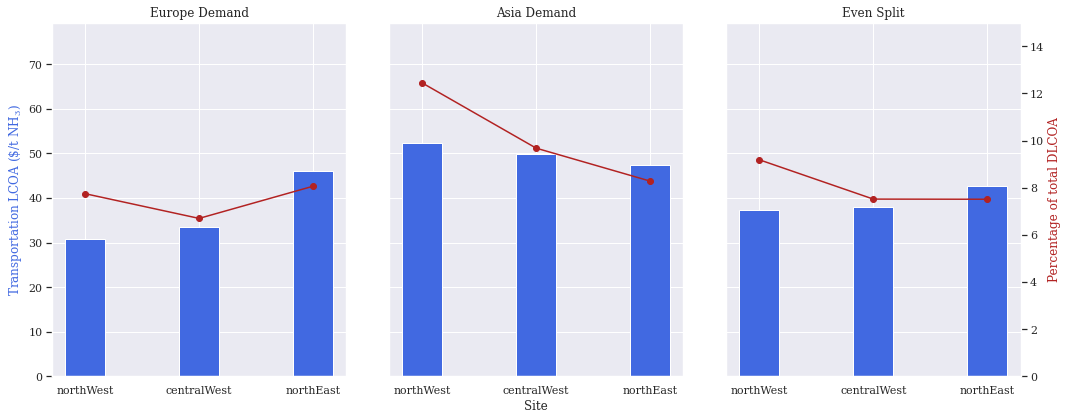

In [3]:
#@title Graphic 1: Plot Figure {form-width: "15%" }


#first do ammonia with raw added cost on the left and percentage of total DLCOA

completeDemandScenarios = ["Europe","Asia","EvenSplit"]
titleList = ["Europe Demand", "Asia Demand", "Even Split"]
fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
width = 0.35 


#duplicating axis so we can have two plots on same graph
ax1List = []
for index in range(3):
  ax1List.append(ax1[index].twinx())

ax2 = ax1List



#getting max totalCost for each site and year (need to sum up cost components)
maxOverallCost = 0
for demandScenario in demandScenarios:
  for year in years:
    maxSpecificCost = np.max(masterPlotDataset[year,demandScenario])

    #checking to see if cost is greater than max
    if(maxSpecificCost > maxOverallCost):
      maxOverallCost = maxSpecificCost   

#adding some buffer to plot
maxCost = maxOverallCost + 25



#first plotting bar charts
for demandScenarioCount,demandScenario in enumerate(completeDemandScenarios): 
  for year in ["2017"]:
    ax1[demandScenarioCount].bar(siteLocs, masterPlotDataset[year,demandScenario],width,color="royalblue")
  #adding graph information
  if(demandScenarioCount == 0):
    ax1[demandScenarioCount].set_ylabel('Transportation LCOA (\$/t $NH_{3}$)',color="royalblue")
    ax1[demandScenarioCount].set_title(titleList[demandScenarioCount])
    ax1[demandScenarioCount].set_ylim(top=maxCost)
  else:
    ax1[demandScenarioCount].set_title(titleList[demandScenarioCount])
    ax1[demandScenarioCount].set_ylim(top=maxCost)
    #hide y axis plot in two right images
    ax1[demandScenarioCount].tick_params(axis='y', colors='white')

  if(demandScenarioCount == 1):
    ax1[demandScenarioCount].set_xlabel('Site') 



#second plotting percentage of total cost
for demandScenarioCount,demandScenario in enumerate(completeDemandScenarios): 
  for year in ["2017"]:

    #calculating percentage of total DLCOA
    dlcoaPercentage = 100*(masterPlotDataset[year,demandScenario]/(plcoaDataset[year]+masterPlotDataset[year,demandScenario]))
    
    #plotting data
    ax2[demandScenarioCount].plot(siteLocs, dlcoaPercentage,color="firebrick",marker="o",lw=1.5)
  
  if(demandScenarioCount != 2):
    #hiding axis if not the final axis
    ax2[demandScenarioCount].axes.set_yticks([])
  else:
    ax2[demandScenarioCount].set_ylabel('Percentage of total DLCOA',color="firebrick")

  #capping axis limit
  ax2[demandScenarioCount].set_ylim(bottom=0,top=15)
  
  ax2[demandScenarioCount].grid(visible=False)


plt.tight_layout()
plt.show()


In [ ]:
#@title SI Graphic 1:  Read in Hydrogen Transportation Costs {form-width: "15%" }

#@title Graphic 1: Read in ammonia data {form-width: "15%" }

#we want dataset where you index by year,demand scenario then get a list for the final cost of the three sites

siteLocs = ["northWest","centralWest","northEast"]
years = ["2017","2018","2019"]
fuelType = "hydrogen"
monthStartPairs = [["1","12"]]
demandScenarios = ["Europe","Asia"]

masterPlotDataset = {}

for year in years:
  for demandScenario in demandScenarios:
    siteCosts = []
    for siteLoc in siteLocs:
      finalCostSum = 0
      dataPoints = 0
      for monthStartPair in monthStartPairs:
        fileName = f"{fuelType}_{siteLoc}_{demandScenario}_{year}_{monthStartPair[0]}_{monthStartPair[1]}"
        try:
          data = pd.read_pickle(f'../modelOutputs/{fileName}.pkl')
          finalCostSum += data["Final Cost"]
          dataPoints += 1
        except:
          print(f"No file: {fileName}")
      
      #adding average to year cost
      siteCosts.append(finalCostSum/len(monthStartPairs))

    #adding to master dataset
    masterPlotDataset[year,demandScenario] = np.array(siteCosts)


#then going through and reading unique even split data
demandScenario = "EvenSplit"
monthStart = 1
monthEnd = 6
for year in years:
  siteCosts = []
  for siteLoc in siteLocs:
    #read in data
    fileName = f"{fuelType}_{siteLoc}_{demandScenario}_{year}_{monthStart}_{monthEnd}"
    data = pd.read_pickle(f'../modelOutputs/{fileName}.pkl')

    #year data
    siteCosts.append(data["Final Cost"])

    #adding to master dataset
    masterPlotDataset[year,demandScenario] = np.array(siteCosts)


#now getting out PLCOH
plcohDataset = {}
for year in years:
  siteLocCosts = []
  for siteLoc in siteLocs:

    #reading in output from optimization model and setting up structure for data viz
    #excelName = f"northWestSite_{timePeriod[0]}_{timePeriod[1]}"
    excelName = f"{siteLoc}_base_{year}"

    #getting out year results for site
    singleValueData = pd.read_excel(f"../../hydrogenProduction/modelOutputs/baseResults/{excelName}.xlsx",sheet_name="singleValueDvs",usecols=["LCOH"]).abs()

    #appending to cost list the final value
    siteLocCosts.append(singleValueData["LCOH"][0])
  
  #changing to $ per ton
  plcohDataset[year] = np.array(siteLocCosts)


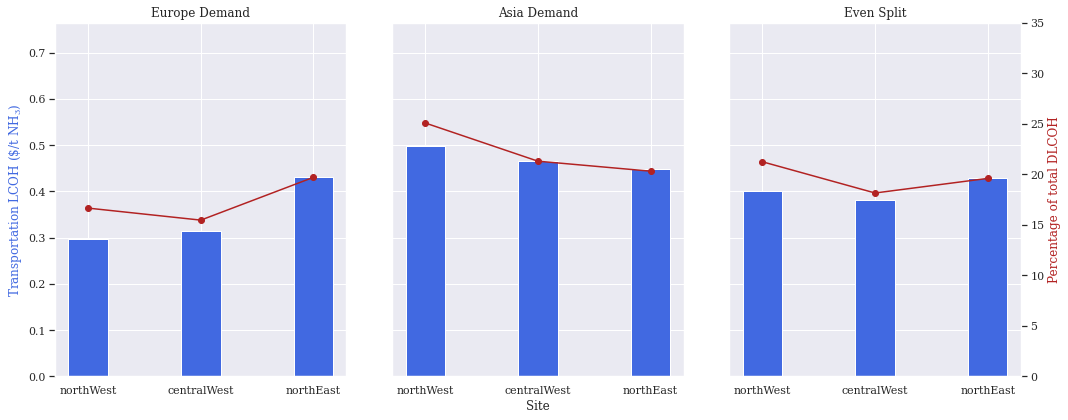

In [ ]:
#@title SI Graphic 1: Plot Hydrogen Figure {form-width: "15%" }

#first do hydrogen with raw added cost on the left and percentage of total DLCOA

completeDemandScenarios = ["Europe","Asia","EvenSplit"]
titleList = ["Europe Demand", "Asia Demand", "Even Split"]
fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
width = 0.35 


#duplicating axis so we can have two plots on same graph
ax1List = []
for index in range(3):
  ax1List.append(ax1[index].twinx())

ax2 = ax1List



#getting max totalCost for each site and year (need to sum up cost components)
maxOverallCost = 0
for demandScenario in demandScenarios:
  for year in years:
    maxSpecificCost = np.max(masterPlotDataset[year,demandScenario])

    #checking to see if cost is greater than max
    if(maxSpecificCost > maxOverallCost):
      maxOverallCost = maxSpecificCost   

#adding some buffer to plot
maxCost = maxOverallCost + .25



#first plotting bar charts
for demandScenarioCount,demandScenario in enumerate(completeDemandScenarios): 
  for year in ["2017"]:
    ax1[demandScenarioCount].bar(siteLocs, masterPlotDataset[year,demandScenario],width,color="royalblue")
  #adding graph information
  if(demandScenarioCount == 0):
    ax1[demandScenarioCount].set_ylabel('Transportation LCOH (\$/t $NH_{3}$)',color="royalblue")
    ax1[demandScenarioCount].set_title(titleList[demandScenarioCount])
    ax1[demandScenarioCount].set_ylim(top=maxCost)
  else:
    ax1[demandScenarioCount].set_title(titleList[demandScenarioCount])
    ax1[demandScenarioCount].set_ylim(top=maxCost)
    #hide y axis plot in two right images
    ax1[demandScenarioCount].tick_params(axis='y', colors='white')

  if(demandScenarioCount == 1):
    ax1[demandScenarioCount].set_xlabel('Site') 



#second plotting percentage of total cost
for demandScenarioCount,demandScenario in enumerate(completeDemandScenarios): 
  for year in ["2017"]:

    #calculating percentage of total DLCOA
    dlcohPercentage = 100*(masterPlotDataset[year,demandScenario]/(plcohDataset[year]+masterPlotDataset[year,demandScenario]))
    
    #plotting data
    ax2[demandScenarioCount].plot(siteLocs, dlcohPercentage,color="firebrick",marker="o",lw=1.5)
  
  if(demandScenarioCount != 2):
    #hiding axis if not the final axis
    ax2[demandScenarioCount].axes.set_yticks([])
  else:
    ax2[demandScenarioCount].set_ylabel('Percentage of total DLCOH',color="firebrick")

  #capping axis limit
  ax2[demandScenarioCount].set_ylim(bottom=0,top=35)
  
  ax2[demandScenarioCount].grid(visible=False)


plt.tight_layout()
plt.show()